In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/Jeppe/Projects/BayesFactorModel


In [3]:
from model.utils import read_party_keys, party_name_from_key
from model.distributionplotter import DistributionPlotter
from model.traceplotter import TracePlotter
from model.parameterframe import ParameterFrame
from model.parameters import Parameters
from model.plotter import Plotter

In [4]:
beta_trace = pd.read_pickle("data//estimation_beta_trace_df.pkl")
sigma_trace = pd.read_pickle("data//estimation_sigma_trace_df.pkl")
factor_trace = pd.read_pickle("data//estimation_factor_trace_df.pkl")

In [5]:
order = ['q2', 'q8', 'q0', 'q1', 'q3', 'q4','q5','q6','q7','q9', 'q10', 'q11', 'q12', 'q13', 'q14']

In [6]:
labels = read_party_keys()

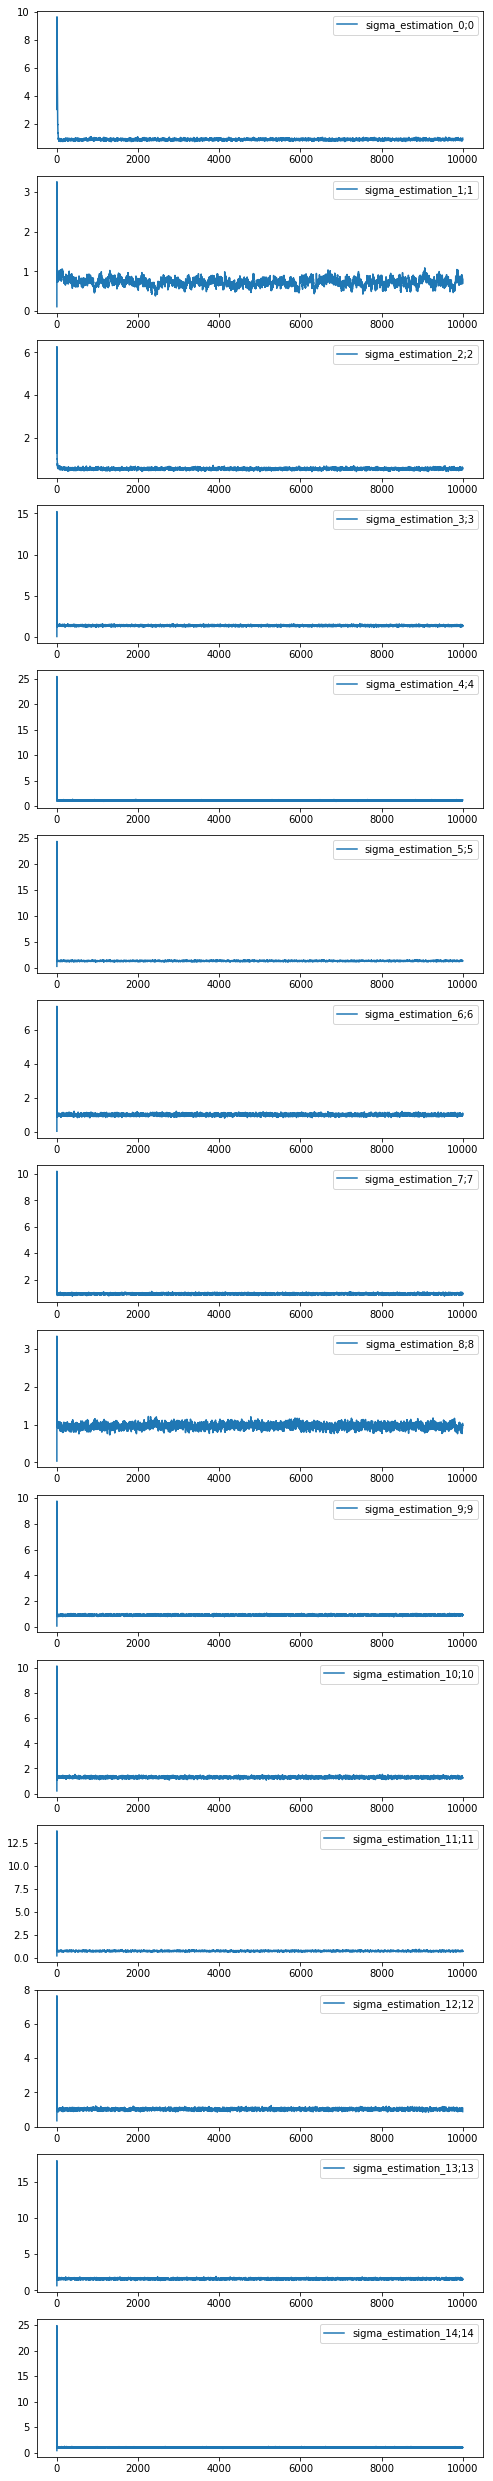

In [23]:
tp = TracePlotter(sigma_trace)
f = tp.plot_diagonal_traces()
f.savefig('figs//estimation_trace_sigma_plot.png')

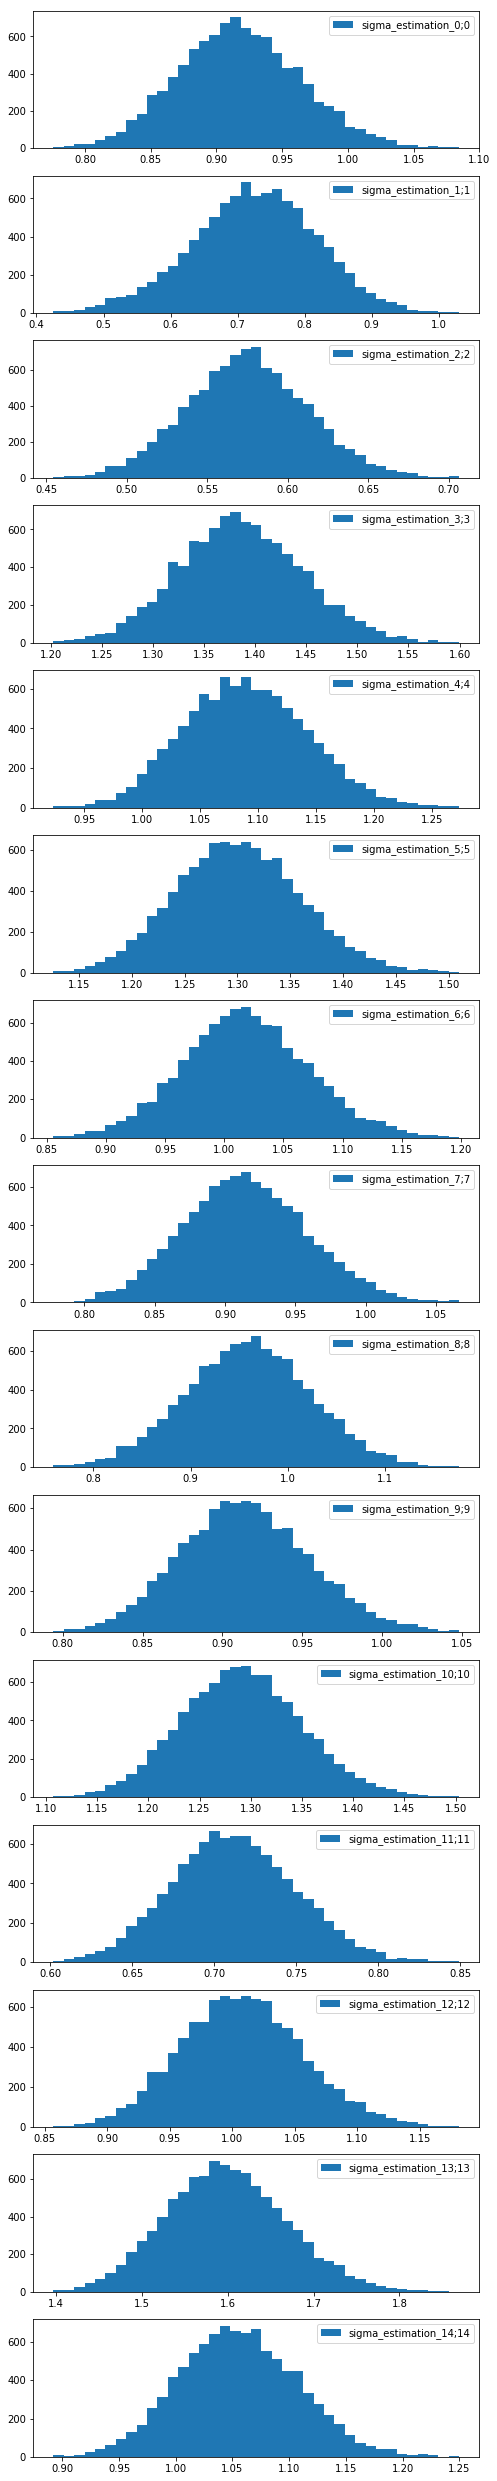

In [8]:
dp = DistributionPlotter(sigma_trace, 0.05)
f = dp.plot_diagonal_hists(skip_obs = 200)
f.savefig('figs//estimation_dist_sigma_plot.png')

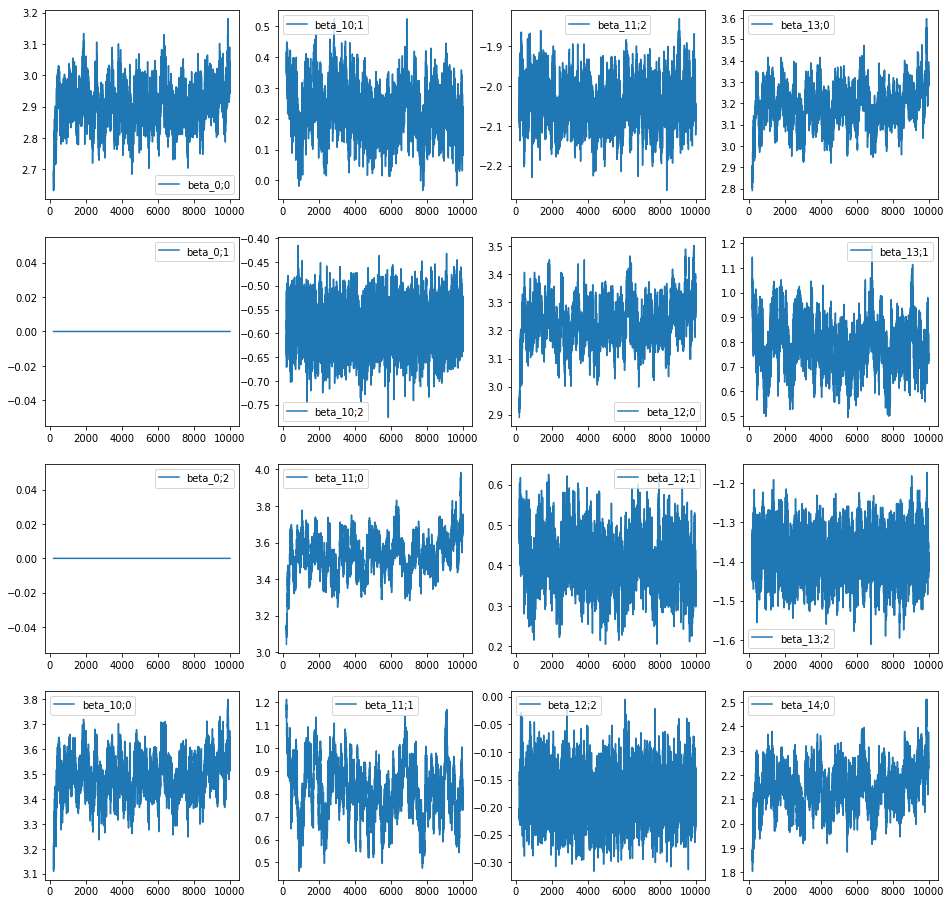

In [9]:
tp = TracePlotter(beta_trace)
f = tp.plot_4x4_traces()
f.savefig('figs//estimation_trace_beta_plot.png')

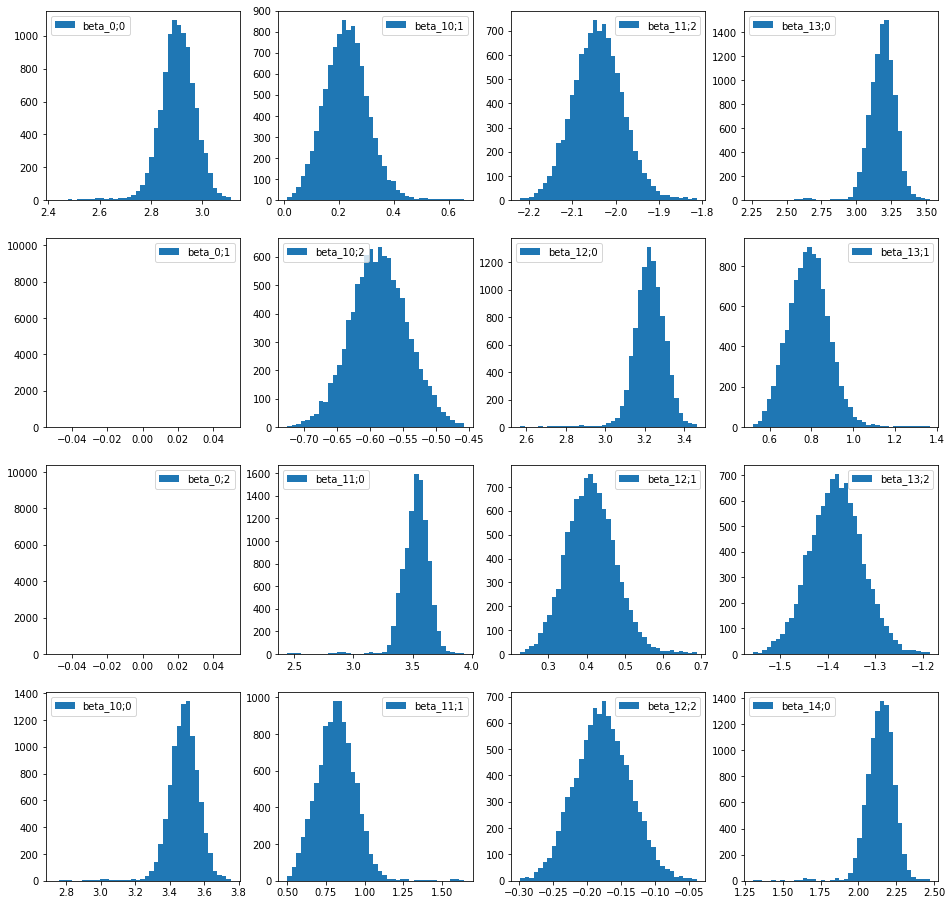

In [10]:
dp = DistributionPlotter(beta_trace, 0.1)
f = dp.plot_4x4_hists( skip_obs = 100)
f.savefig('figs//estimation_dist_beta_plot.png')

In [11]:
beta = Parameters(beta_trace)
beta._calc_param_mean_dict(1000)

In [12]:
F = Parameters(factor_trace)
F._calc_param_mean_dict(1000)
factors = F.params_to_df()

In [13]:
factors['party_names'] = [party_name_from_key(label) for label in labels]

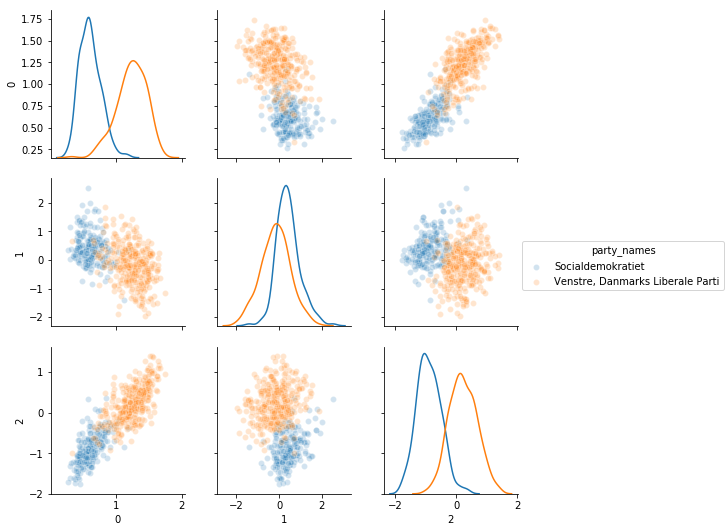

In [14]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Socialdemokratiet')]
scatter_v_s = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_s.savefig('figs//estimation_scatter_v_df.png')



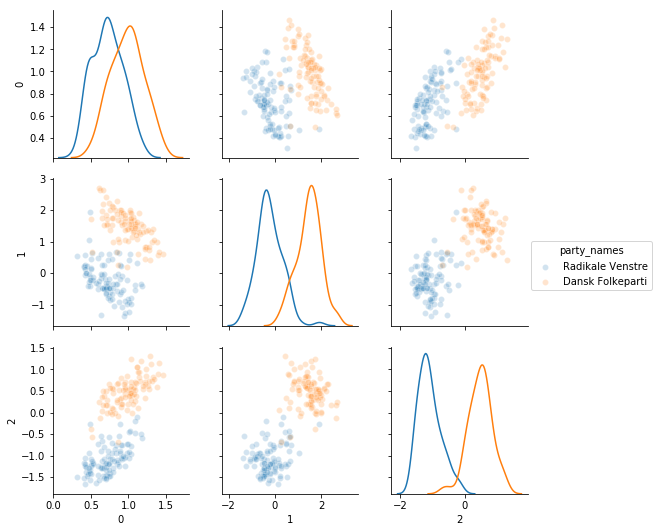

In [15]:
tmp = factors.loc[(factors['party_names'] == 'Radikale Venstre') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_rv_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_rv_df.savefig('figs//estimation_scatter_rv_df.png')


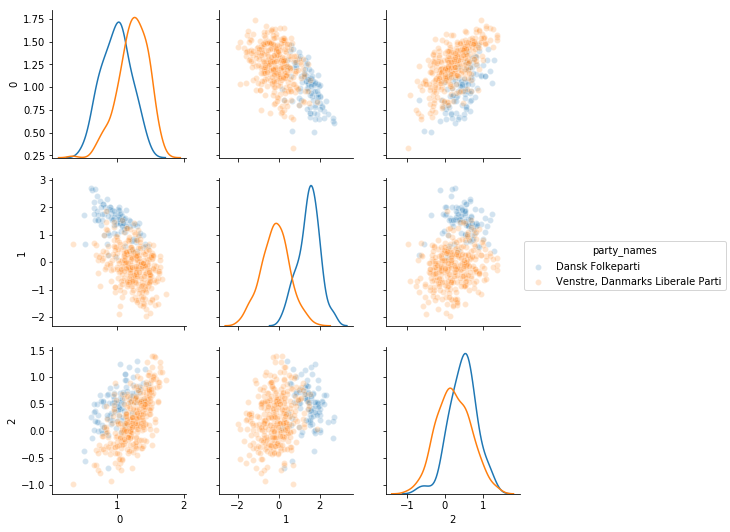

In [16]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_v_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_df.savefig('figs//estimation_scatter_v_df.png')


In [17]:
set(factors['party_names'])

{'Alternativet',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten - De Rød-Grønne',
 'Liberal Alliance',
 'Nye Borgerlige',
 'Radikale Venstre',
 'SF - Socialistisk Folkeparti',
 'Socialdemokratiet',
 'Venstre, Danmarks Liberale Parti'}

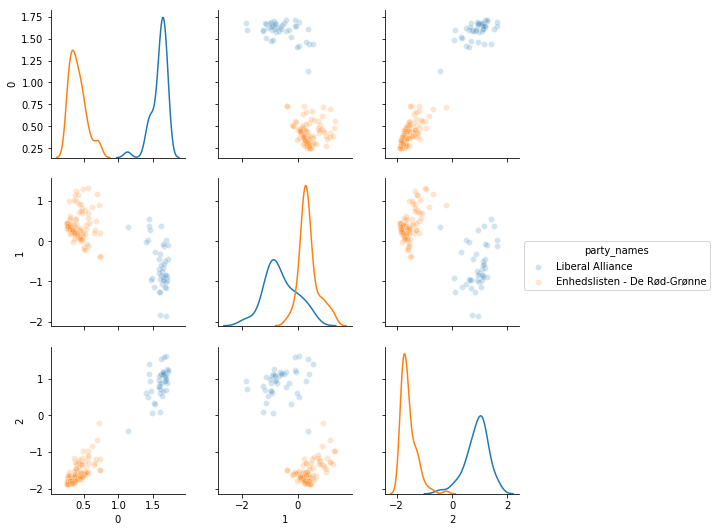

In [18]:
tmp = factors.loc[(factors['party_names'] == 'Liberal Alliance') | (factors['party_names'] == 'Enhedslisten - De Rød-Grønne')]
scatter_la_el = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_la_el.savefig('figs//estimation_scatter_la_el.png')



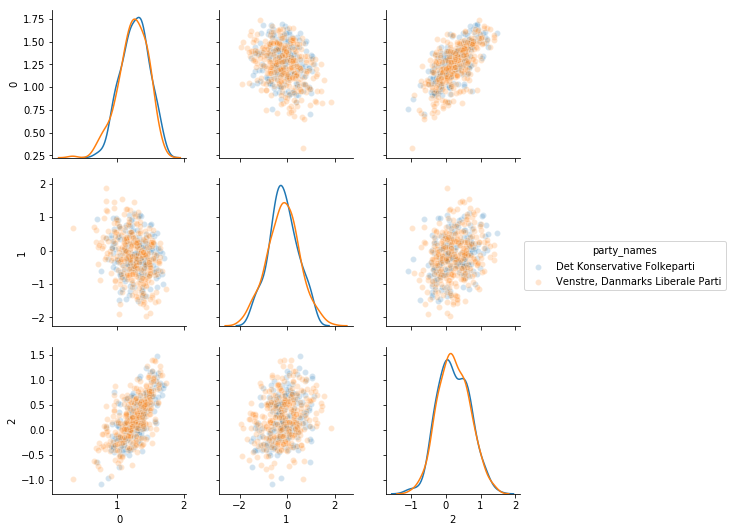

In [19]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Det Konservative Folkeparti')]
scatter_v_c = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_c.savefig('figs//estimation_scatter_v_c.png')


In [20]:
loadings = beta.params_to_df()

In [21]:
loadings['question'] = order

In [22]:
latex_loadings = loadings.round(2)
latex_loadings.set_index('question', inplace=True)
print(latex_loadings.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     0 &     1 &     2 \\
question &       &       &       \\
\midrule
q2       &  2.91 &  0.00 &  0.00 \\
q8       &  2.57 &  0.93 &  0.00 \\
q0       &  2.62 & -0.15 &  0.01 \\
q1       &  2.64 &  0.11 & -0.60 \\
q3       &  3.39 &  0.15 & -0.34 \\
q4       &  3.28 &  0.80 & -1.86 \\
q5       &  3.33 &  1.06 & -1.96 \\
q6       &  3.51 &  0.75 & -1.92 \\
q7       &  2.30 &  0.24 & -2.05 \\
q9       &  1.99 &  0.36 & -0.11 \\
q10      &  3.49 &  0.22 & -0.59 \\
q11      &  3.54 &  0.81 & -2.04 \\
q12      &  3.23 &  0.41 & -0.18 \\
q13      &  3.19 &  0.78 & -1.38 \\
q14      &  2.15 &  0.73 & -2.05 \\
\bottomrule
\end{tabular}

